### Movie Genres Data Analysis

#### Introduction

We are going to focus on highly on genre's. I want to know everything about Genre's. 

Here are some things I want to look at:

#### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high average budget and revenue?
3. Which genres have high average profit?
4. Which genres have high average popularity?
5. Which genres have highest number of movies with an voting average greatest than 8?

#### Research Hypotheses (H):

1. The best movies according to vote average return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.

In [247]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
pd.set_option("display.max.rows",11000)
pd.set_option("display.max.columns",22)

In [251]:
movies = pd.read_csv(r"C:\Data Scientist Career\Python\Pandas Data Analysis Datasets\imdb_movies.csv")

#### Data Exploration

In [254]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [256]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


#### Data Cleaning

##### Removing Duplicates

In [260]:
# Identifying duplicate data

movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000000,2010,30000000.000000,967000.000000


In [262]:
# Removing duplicate data

movies.drop_duplicates(inplace = True)

In [264]:
# Removing null values in a specific column

movies.dropna(subset = ["genres"], inplace = True)

In [266]:
##### Creating a Profit column

movies["profit"] = movies["revenue"] - movies["budget"]

In [268]:
### Specifying data (columns) for future use

movies_genre = movies[["original_title","popularity","budget","revenue","runtime","genres","release_date","vote_count","vote_average","profit"]]

In [270]:
# Exploring the data

movies_genre.head()

,original_title,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,profit
0,Jurassic World,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,Mad Max: Fury Road,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,Insurgent,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,Furious 7,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


##### Splitting the Data

In [273]:
# Splitting the values in a column

movies_genre["genres"].str.split("|")

0           [Action, Adventure, Science Fiction, Thriller]
1           [Action, Adventure, Science Fiction, Thriller]
2                   [Adventure, Science Fiction, Thriller]
3            [Action, Adventure, Science Fiction, Fantasy]
4                                [Action, Crime, Thriller]
5                    [Western, Drama, Adventure, Thriller]
6           [Science Fiction, Action, Thriller, Adventure]
7                      [Drama, Adventure, Science Fiction]
8                   [Family, Animation, Adventure, Comedy]
9                              [Comedy, Animation, Family]
10                              [Action, Adventure, Crime]
11           [Science Fiction, Fantasy, Action, Adventure]
12                                [Drama, Science Fiction]
13                       [Action, Comedy, Science Fiction]
14                    [Action, Adventure, Science Fiction]
15                        [Crime, Drama, Mystery, Western]
16                               [Crime, Action, Thrille

In [274]:
# Reshaping data by unstacking and creating multi-level indexing

split = movies_genre["genres"].str.split("|").apply(Series,1).stack()
split

C:\Users\user\AppData\Local\Temp\ipykernel_13056\2463871657.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre["genres"].str.split("|").apply(Series,1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [276]:
# Removing multi-level indexing

split.index = split.index.droplevel(-1)

# Defining the name of the new column
split.name = "genres_split"

split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres_split, Length: 26955, dtype: object

In [279]:
# Deleting "genres" column in movies_genre DataFrame
del movies_genre["genres"]

# Joining the data (adding genres_split column)
movies_genre = movies_genre.join(split)

movies_genre

,original_title,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,profit,genres_split
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Action
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Adventure
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Thriller
1,Mad Max: Fury Road,28.419936,150000000,378436354,120,5/13/15,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,Beregis Avtomobilya,0.065141,0,0,94,1/1/66,11,6.500000,0,Mystery
10863,Beregis Avtomobilya,0.065141,0,0,94,1/1/66,11,6.500000,0,Comedy
10864,"What's Up, Tiger Lily?",0.064317,0,0,80,11/2/66,22,5.400000,0,Action
10864,"What's Up, Tiger Lily?",0.064317,0,0,80,11/2/66,22,5.400000,0,Comedy


##### Exploratory Data Analysis

In [282]:
# Q: 1. Which genres are the most common (number of movies made)?

pd.DataFrame(movies_genre.groupby("genres_split").original_title.nunique()).sort_values("original_title",ascending = False)

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


In [286]:
genres_count = pd.DataFrame(movies_genre.groupby("genres_split").original_title.nunique()).sort_values("original_title",ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

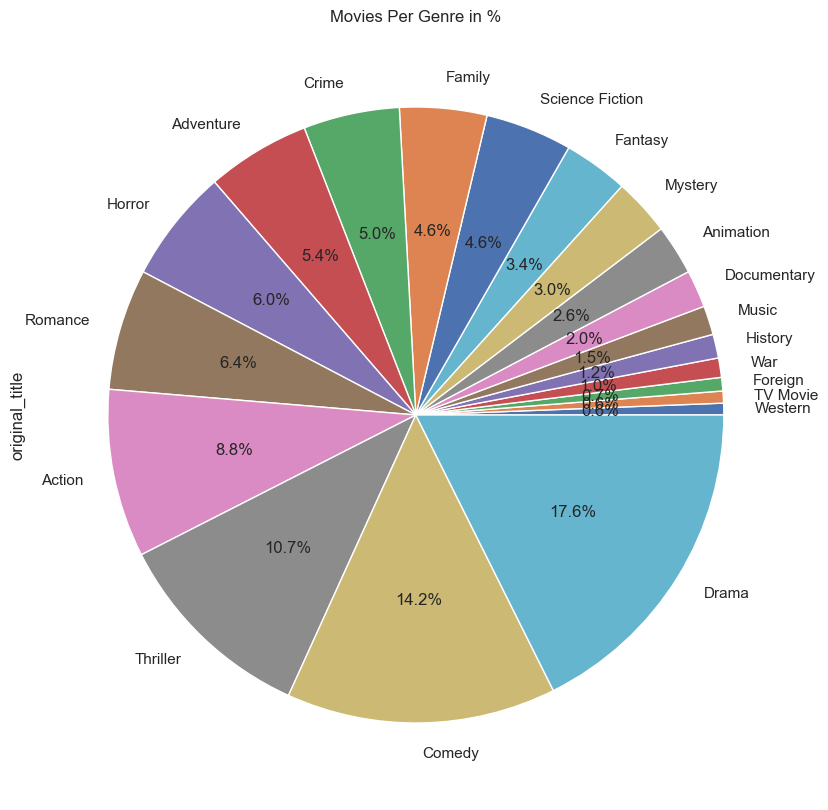

In [288]:
genres_count["original_title"].plot.pie(title = "Movies Per Genre in %", autopct = "%1.1f%%", figsize = (10,10))

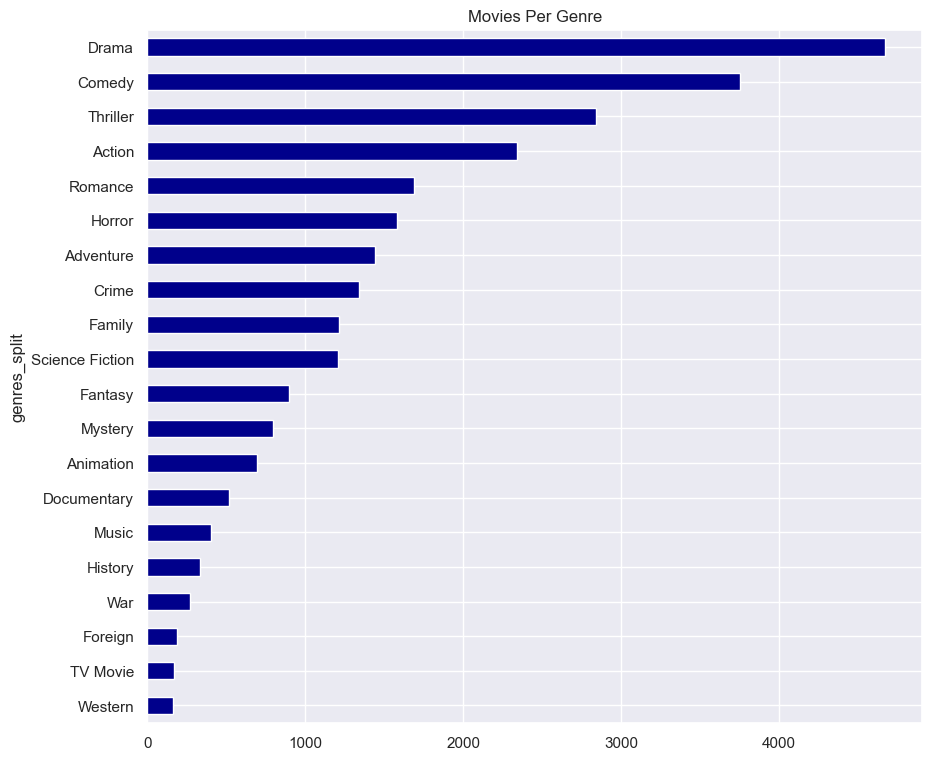

In [294]:
genres_count["original_title"].plot.barh(title = "Movies Per Genre", color = "DarkBlue", figsize = (10,9))
plt.show()

In [296]:
# Q: 2. Which genres have high average budget and revenue?

In [298]:
genres_avg = movies_genre.groupby("genres_split")[["popularity","budget","revenue","runtime","vote_count","vote_average","profit"]].mean()
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [300]:
# Converting the scientific data type into float data type

pd.options.display.float_format = "{:2f}".format

In [302]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [304]:
genres_avg.sort_values("budget",ascending = True, inplace = True)
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Mystery,0.690012,16119270.062963,40217566.661728,105.928395,236.998765,5.946790,24098296.598765


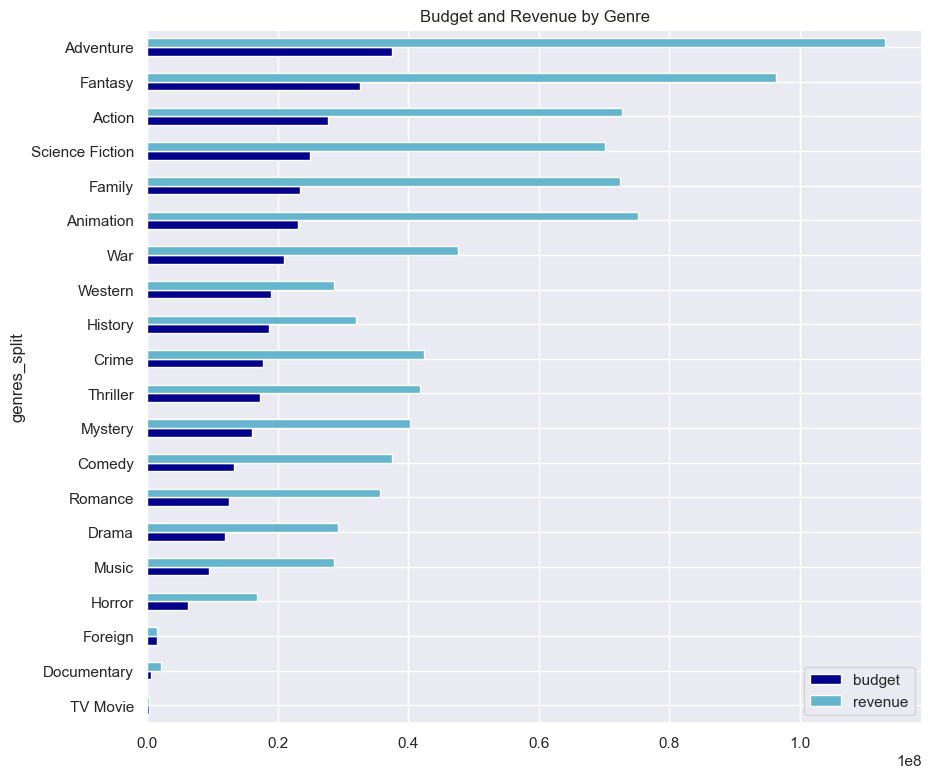

In [306]:
genres_avg[["budget","revenue"]].plot.barh(title = "Budget and Revenue by Genre", color = ("DarkBlue","c"), figsize = (10,9))
plt.show()

In [318]:
# Sorting the data in a DataFrame based on revenue

genres_avg.sort_values("revenue",ascending = True, inplace = True)

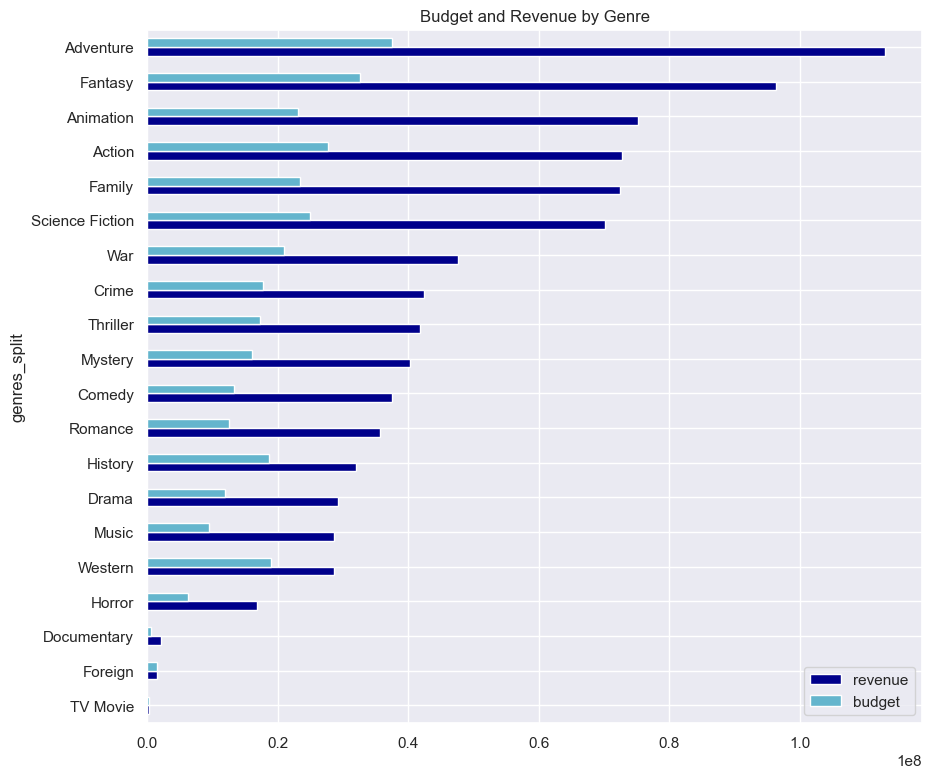

In [320]:
genres_avg[["revenue","budget"]].plot.barh(title = "Budget and Revenue by Genre", color = ("DarkBlue","c"), figsize = (10,9))
plt.show()

In [322]:
# Q: 3. Which genres have high average profit?

In [324]:
# Sorting the data in a DataFrame based on profit

genres_avg.sort_values("profit",ascending = True, inplace = True)

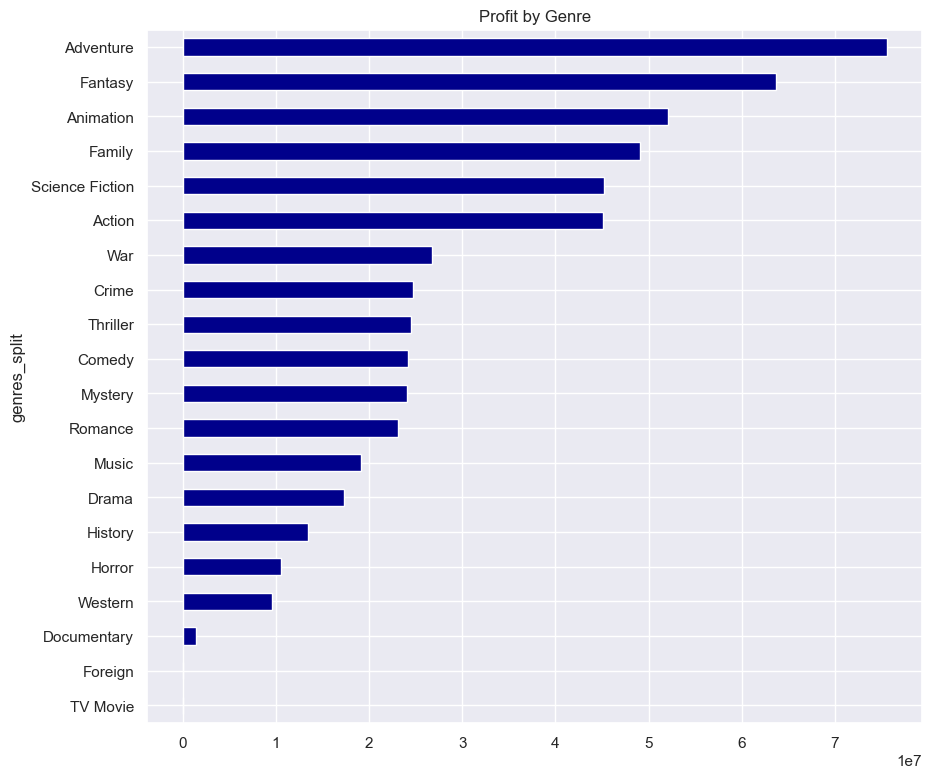

In [328]:
genres_avg["profit"].plot.barh(title = "Profit by Genre", color = "DarkBlue", figsize = (10,9))
plt.show()

In [57]:
# Q: 4. Which genres have high average popularity?

In [330]:
# Sorting the data in a DataFrame based on popularity

genres_avg.sort_values("popularity",ascending = True, inplace = True)

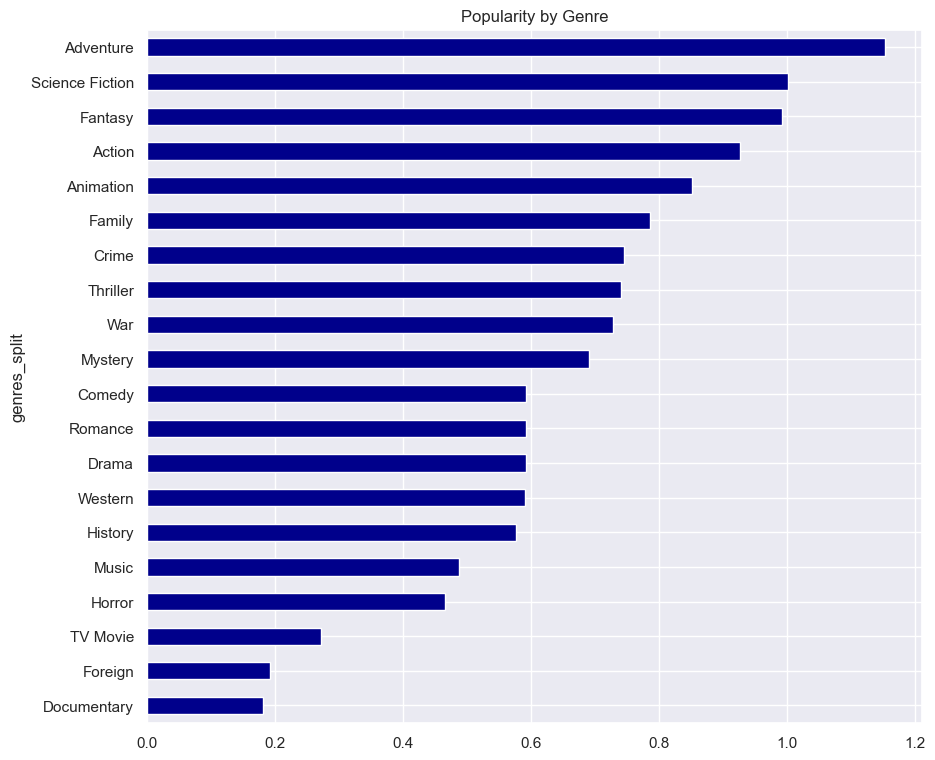

In [332]:
genres_avg["popularity"].plot.barh(title = "Popularity by Genre", color = "DarkBlue", figsize = (10,9))
plt.show()

In [334]:
# Q: 5. Which genres have highest number of movies with an voting average greatest than 8?

In [336]:
movies_genre.head()

,original_title,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,profit,genres_split
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Action
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Adventure
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.500000,1363528810,Thriller
1,Mad Max: Fury Road,28.419936,150000000,378436354,120,5/13/15,6185,7.100000,228436354,Action


In [338]:
# Filtering the data by two different parameters

movies_genre[(movies_genre["vote_count"] >= 50) & (movies_genre["vote_average"] >= 8)]

,original_title,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,profit,genres_split
9,Inside Out,6.326804,175000000,853708609,94,6/9/15,3935,8.000000,678708609,Comedy
9,Inside Out,6.326804,175000000,853708609,94,6/9/15,3935,8.000000,678708609,Animation
9,Inside Out,6.326804,175000000,853708609,94,6/9/15,3935,8.000000,678708609,Family
35,Room,3.557846,6000000,35401758,117,10/16/15,1520,8.000000,29401758,Drama
35,Room,3.557846,6000000,35401758,117,10/16/15,1520,8.000000,29401758,Thriller
609,The Jinx: The Life and Deaths of Robert Durst,0.033378,0,0,240,2/8/15,72,8.400000,0,Documentary
629,Interstellar,24.949134,165000000,621752480,169,11/5/14,6498,8.000000,456752480,Adventure
629,Interstellar,24.949134,165000000,621752480,169,11/5/14,6498,8.000000,456752480,Drama
629,Interstellar,24.949134,165000000,621752480,169,11/5/14,6498,8.000000,456752480,Science Fiction
636,The Imitation Game,8.110711,14000000,233555708,113,11/14/14,3478,8.000000,219555708,History


In [340]:
# Filtering the data and creating two different DataFrames

vote_fifty = movies_genre[(movies_genre["vote_count"] >= 50) & (movies_genre["vote_average"] >= 8)]
vote_zero = movies_genre[movies_genre["vote_average"] >= 8]

In [348]:
# Grouping, aggregating and ordering the data in ascending order and creating new DataFrame

genres_vote = pd.DataFrame(vote_fifty.groupby("genres_split").vote_average.nunique()).sort_values("vote_average",ascending = True)
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


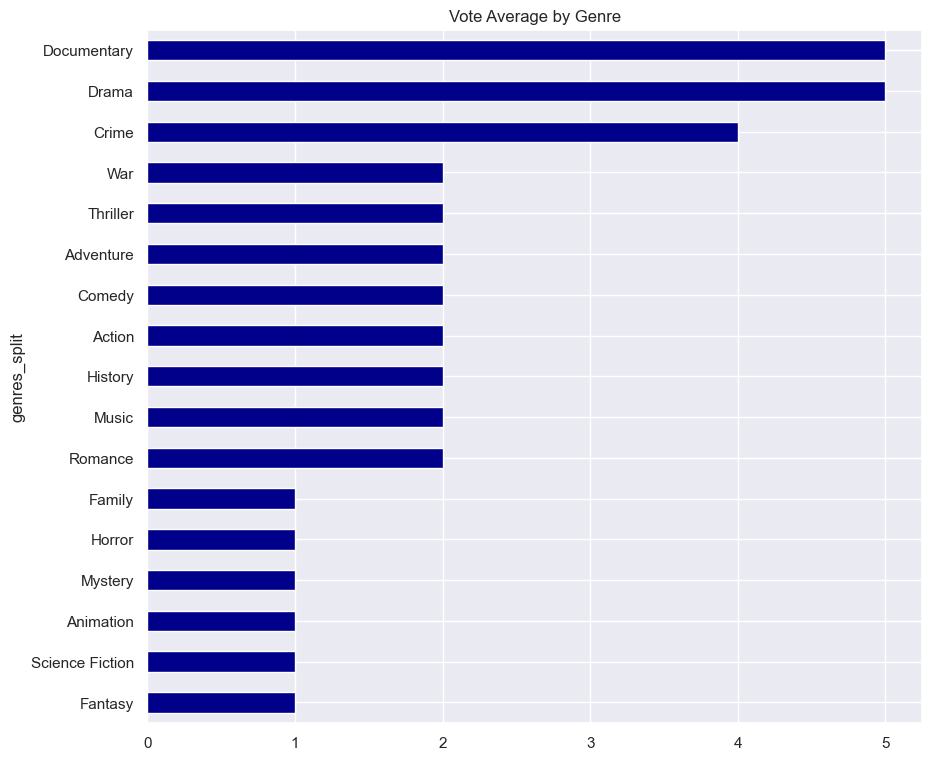

In [350]:
genres_vote["vote_average"].plot.barh(title = "Vote Average by Genre", color = "DarkBlue", figsize = (10,9))
plt.show()

In [352]:
# Grouping, aggregating and ordering the data in ascending order and creating new DataFrame

genres_vote = pd.DataFrame(vote_zero.groupby("genres_split").vote_average.nunique()).sort_values("vote_average",ascending = True)

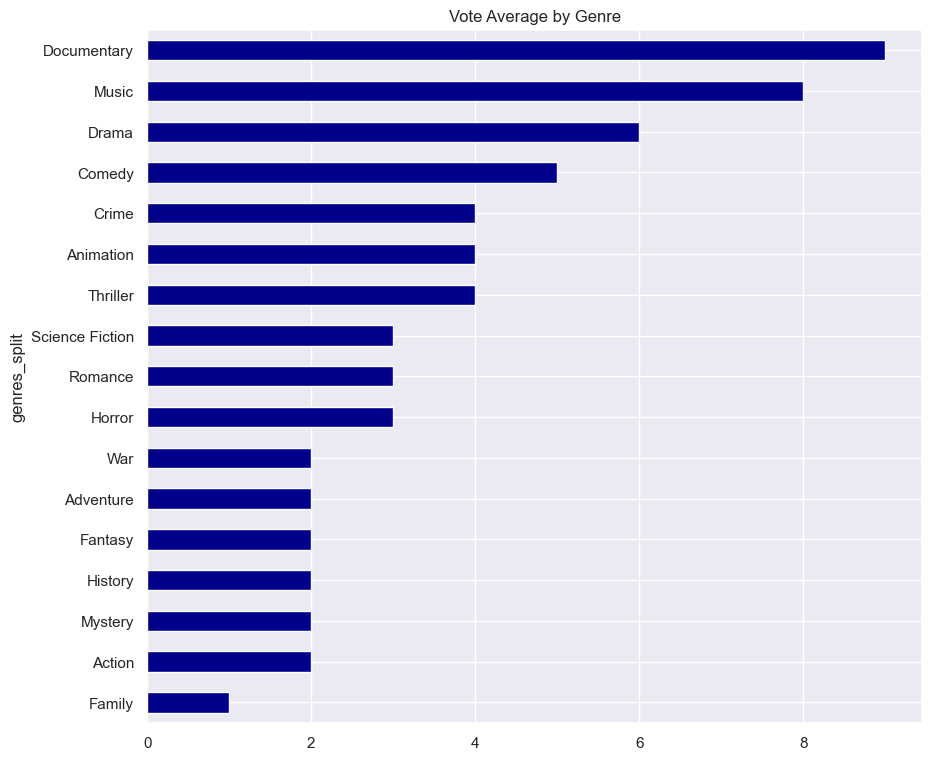

In [354]:
genres_vote["vote_average"].plot.barh(title = "Vote Average by Genre", color = "DarkBlue", figsize = (10,9))
plt.show()

In [77]:
# Research Hypothesis: The best movies according to vote average return high profit and revenue.

In [356]:
# Removing duplicates

movies.drop_duplicates(inplace = True)

# Calculating and creating a new column based on that calculation
movies["profit"] = movies["revenue"] - movies["budget"]

# Specifying data (columns) for future use
movies_genre = movies[["original_title","popularity","budget","revenue","runtime","genres","release_date","vote_count","vote_average","profit"]]

In [360]:
# Filtering data and creating a new DataFrame

movies_counted = movies_genre[movies_genre["vote_count"] >= 50]

In [86]:
# Exploring correlations on numerical data (using spearman method)

movies_counted.corr(method = "spearman", numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


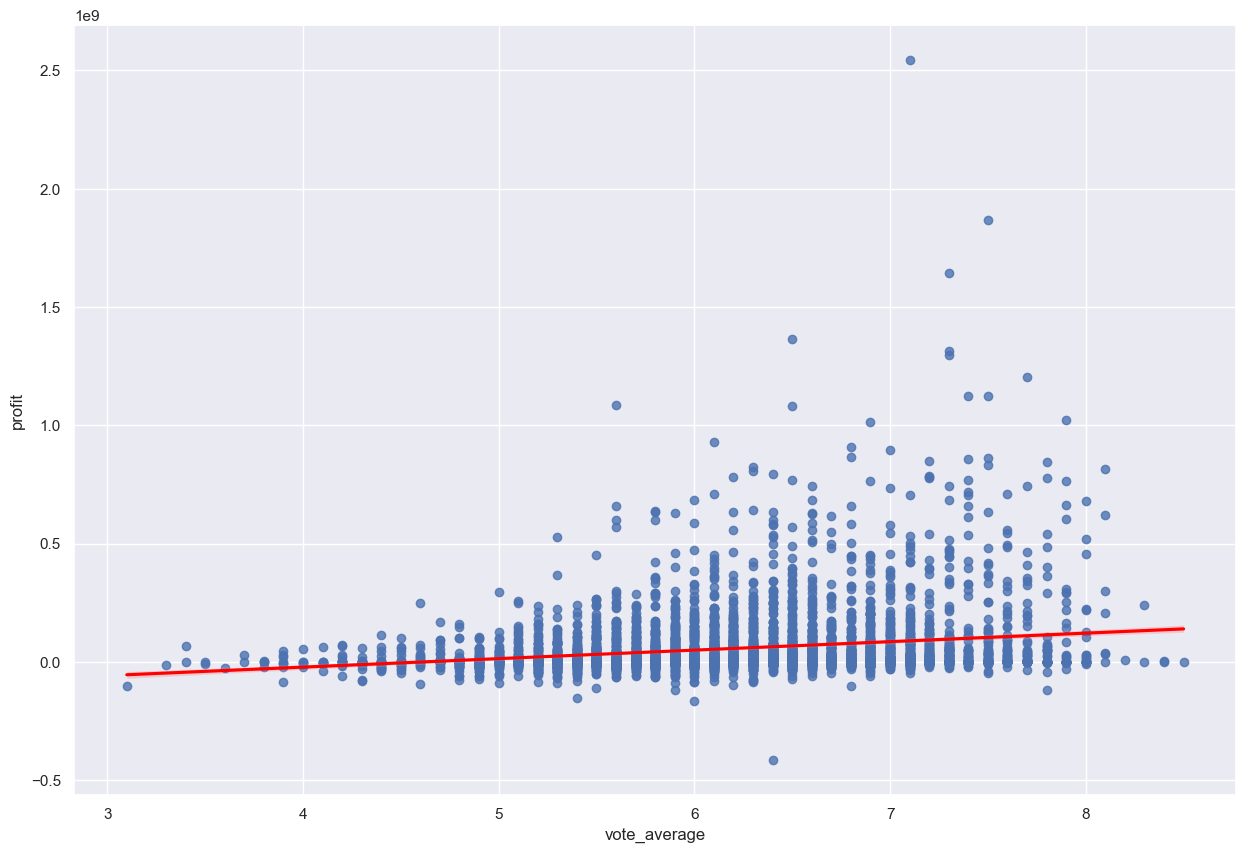

In [362]:
sns.regplot(x = "vote_average", y = "profit", data = movies_counted, line_kws = {"color":"red"})
plt.show()

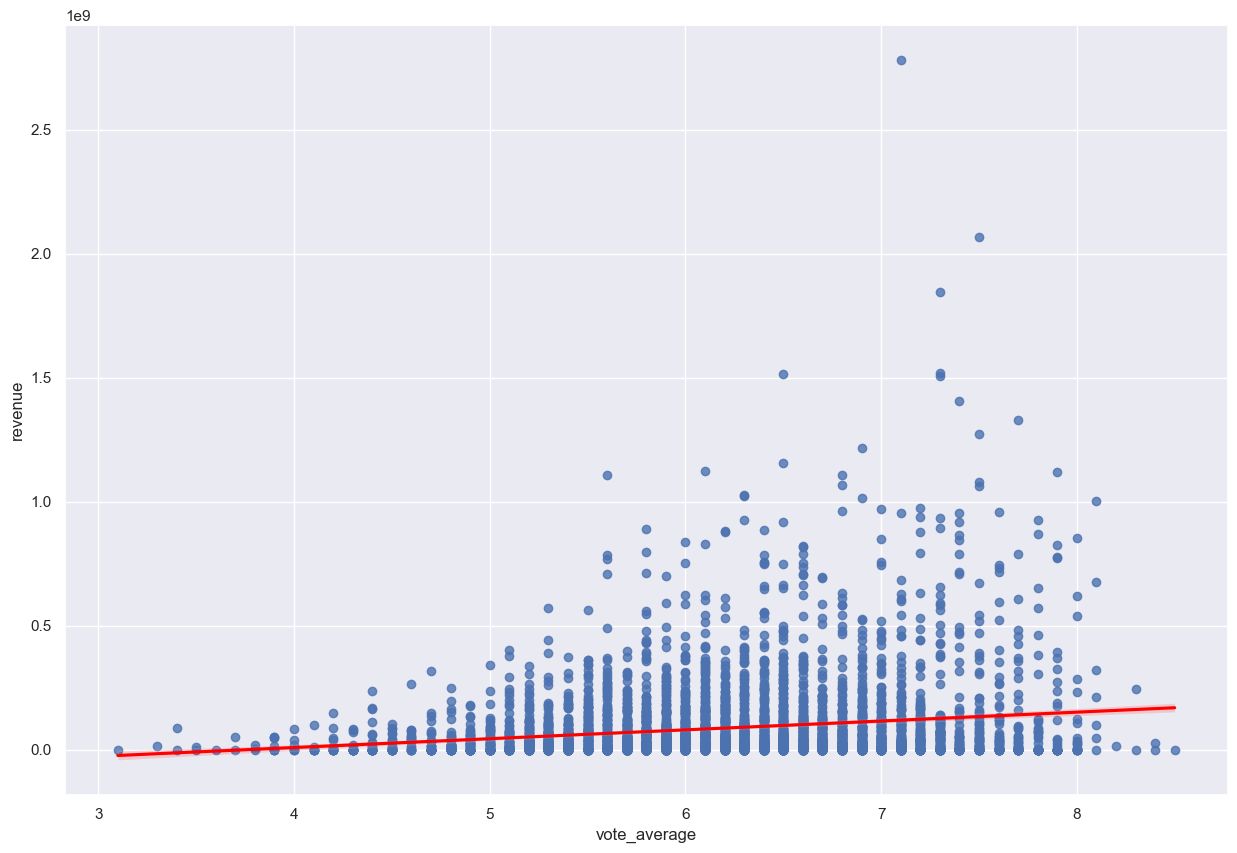

In [364]:
sns.regplot(x = "vote_average", y = "revenue", data = movies_counted, line_kws = {"color":"red"})
plt.show()

In [94]:
# Research Hypothesis: The best movies according to popularity return high profit and revenue.

In [366]:
# Exploring correlations on numerical data (using spearman method)

movies_counted.corr(method = "spearman", numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


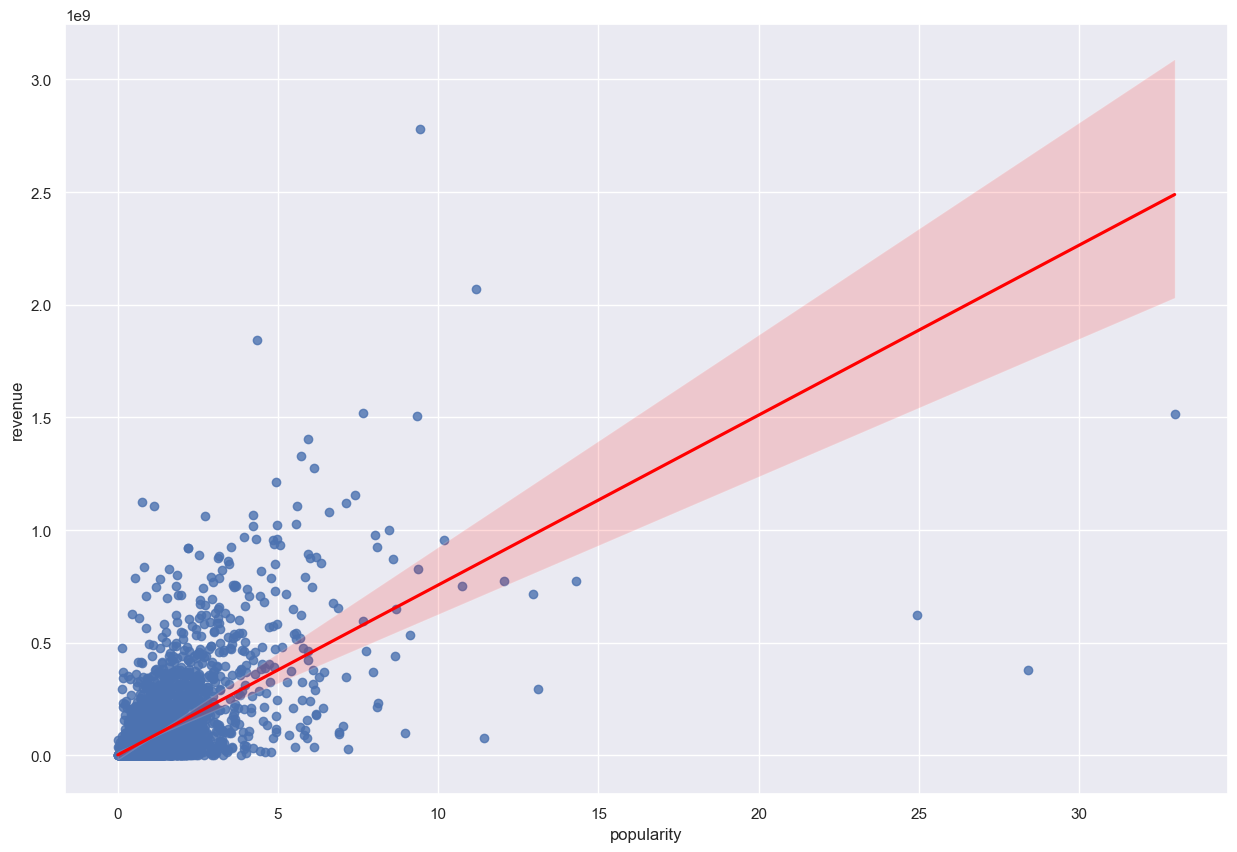

In [370]:
sns.regplot(x = "popularity", y = "revenue", data = movies_counted, line_kws = {"color":"red"})
plt.show()

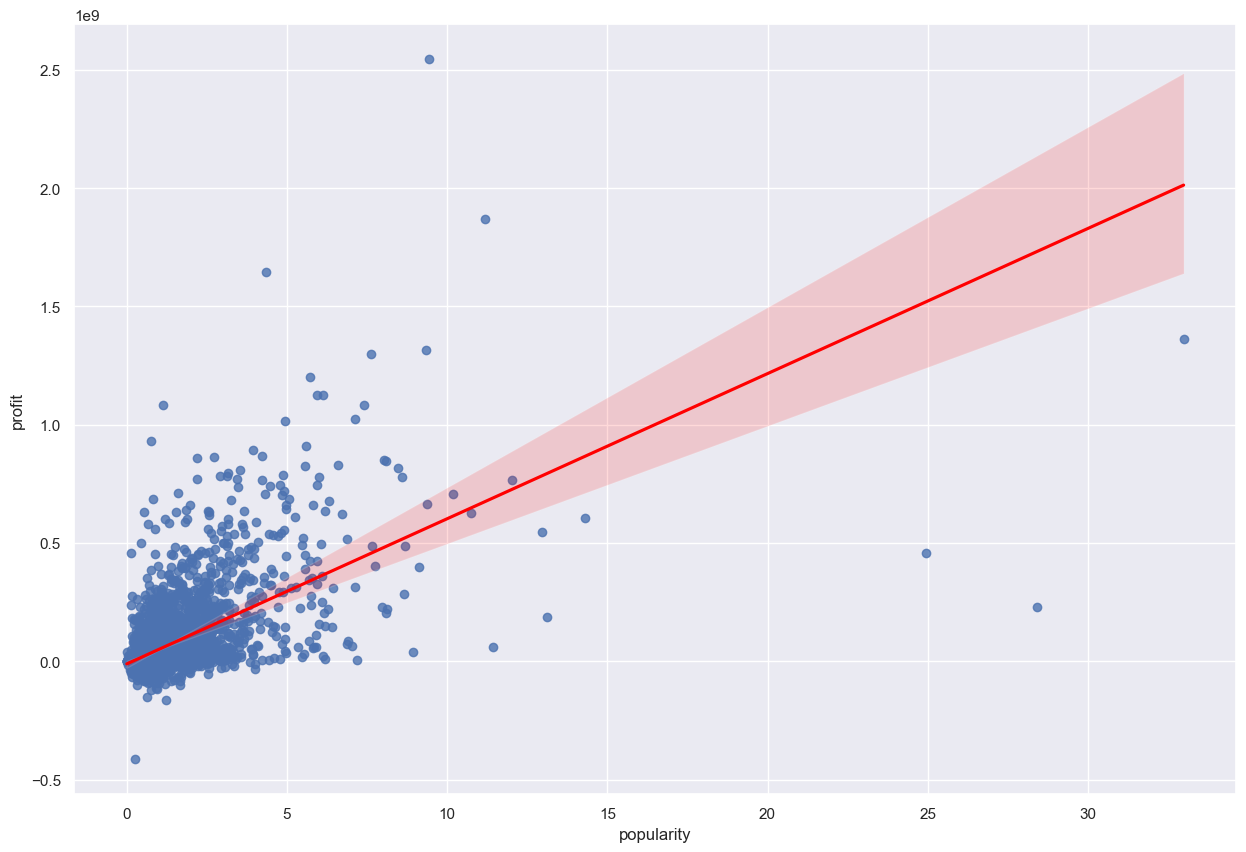

In [368]:
sns.regplot(x = "popularity", y = "profit", data = movies_counted, line_kws = {"color":"red"})
plt.show()

In [104]:
# Research Hypothesis: Highly budgeted movies return high profit.

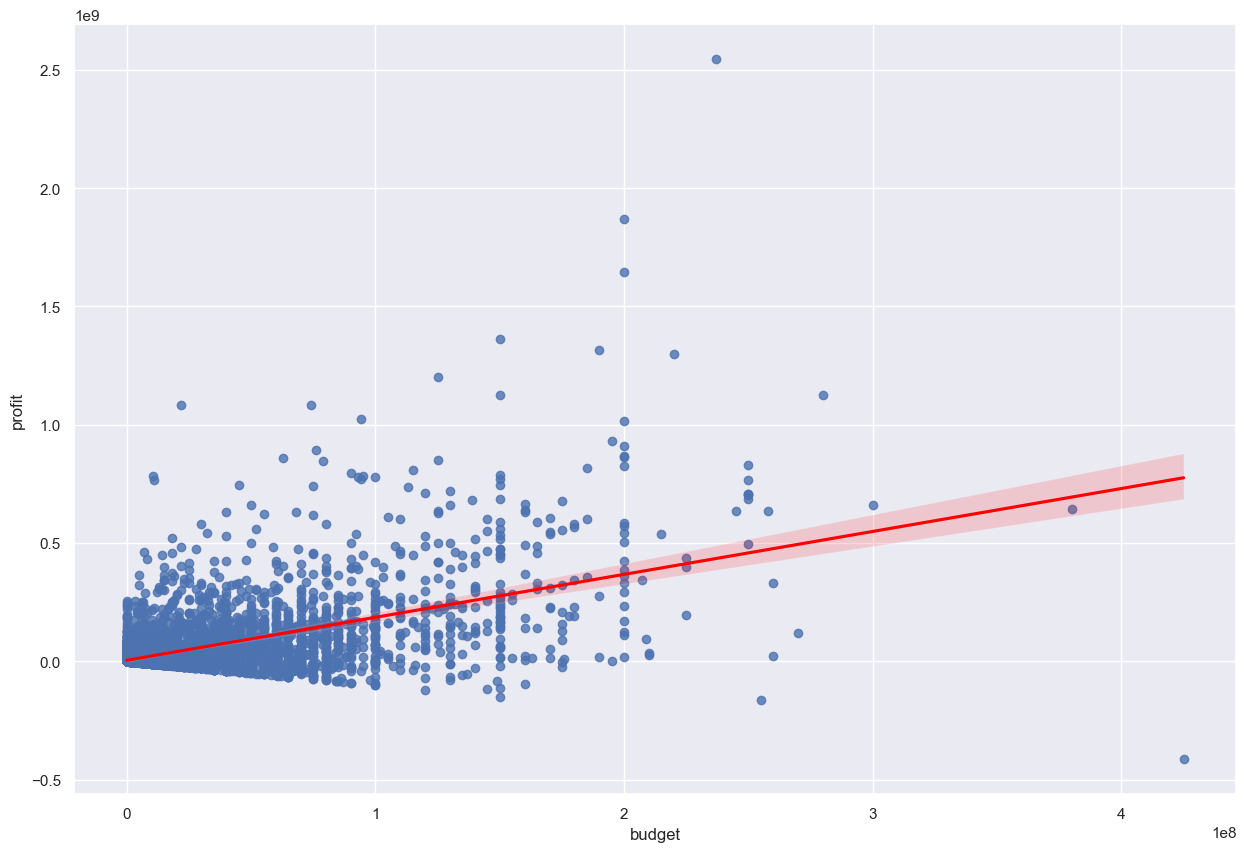

In [372]:
sns.regplot(x = "budget", y = "profit", data = movies_counted, line_kws = {"color":"red"})
plt.show()

In [114]:
# Research Hypothesis: Highly budgeted movies have a high popularity.

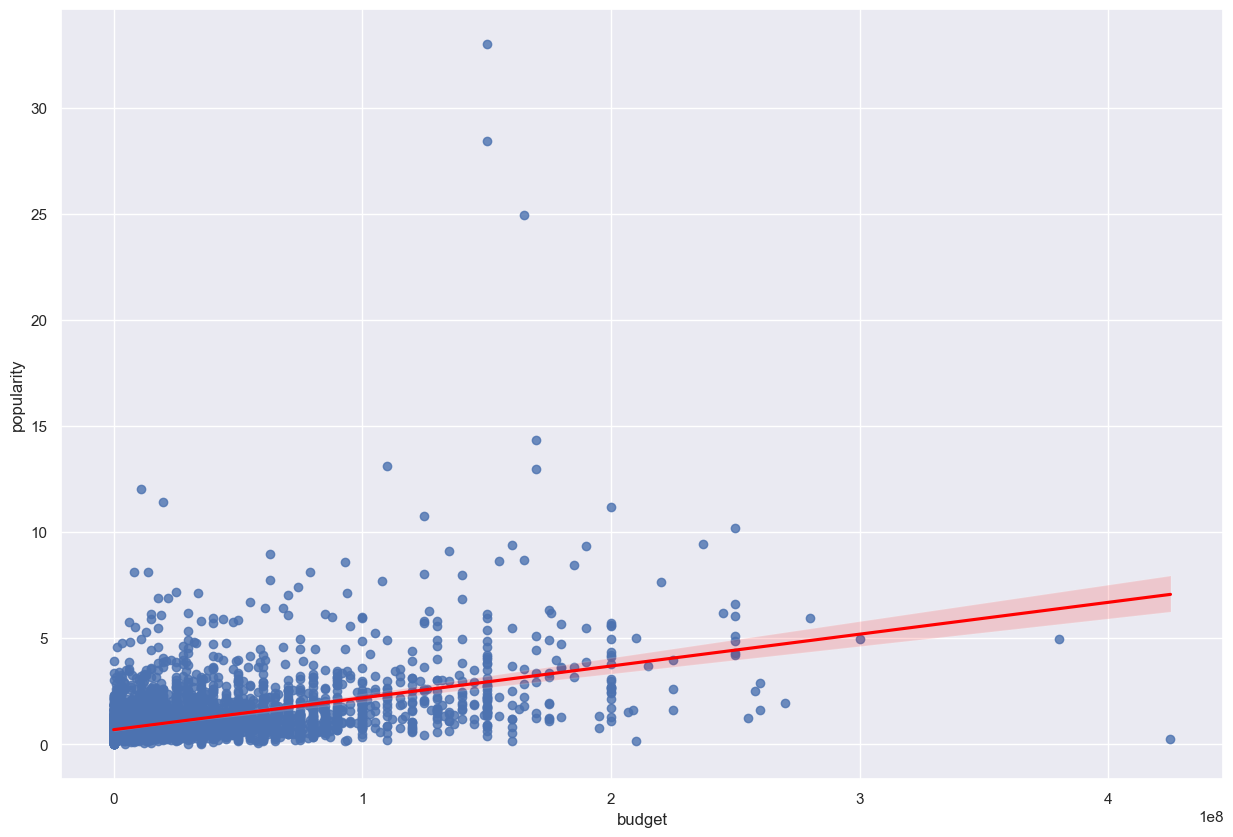

In [374]:
sns.regplot(x = "budget", y = "popularity", data = movies_counted, line_kws = {"color":"red"})
plt.show()

In [123]:
# 5. Look at Profit Per Genre Per Year

In [376]:
# Specifying data (columns) for future use

movies_data = movies[["original_title","popularity","budget","revenue","runtime","genres","release_year","vote_count","vote_average","profit"]]

In [378]:
# Reshaping data by unstacking and creating multi-level indexing
split = movies_data["genres"].str.split("|").apply(Series,1).stack()

# Removing multi-level indexing
split.index = split.index.droplevel(-1)

# Defining the name of the new column
split.name = "genres_split"

# Deleting "genres" column in movies_genre DataFrame
del movies_data["genres"]

# Joining the data (adding genres_split column)
movies_genre_data = movies_data.join(split)

C:\Users\user\AppData\Local\Temp\ipykernel_13056\2354523120.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_data["genres"].str.split("|").apply(Series,1).stack()


In [380]:
movies_genre_data.head()

,original_title,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit,genres_split
0,Jurassic World,32.985763,150000000,1513528810,124,2015,5562,6.500000,1363528810,Action
0,Jurassic World,32.985763,150000000,1513528810,124,2015,5562,6.500000,1363528810,Adventure
0,Jurassic World,32.985763,150000000,1513528810,124,2015,5562,6.500000,1363528810,Science Fiction
0,Jurassic World,32.985763,150000000,1513528810,124,2015,5562,6.500000,1363528810,Thriller
1,Mad Max: Fury Road,28.419936,150000000,378436354,120,2015,6185,7.100000,228436354,Action


In [382]:
# Grouping and aggregating the data and create a new DataFrame

time_genre = pd.DataFrame(movies_genre_data.groupby(["release_year","genres_split"])["profit"].mean())

In [384]:
# Pivoting the data

final_genre = pd.pivot_table(time_genre, values = "profit", index = "genres_split", columns = "release_year")

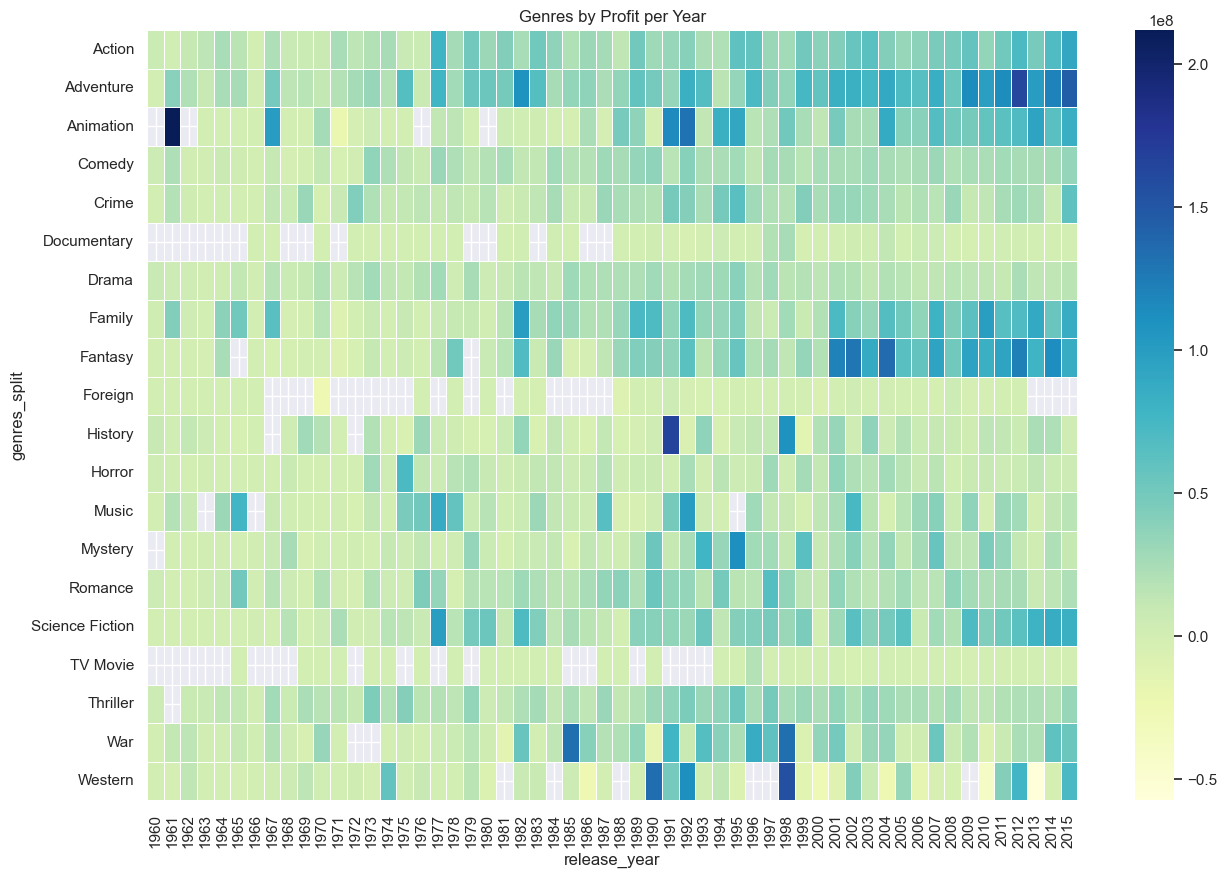

In [386]:
sns.set(rc = {"figure.figsize":(15,10)})
sns.heatmap(final_genre, cmap = "YlGnBu", linewidths = .5)
plt.title("Genres by Profit per Year")

plt.show()